Hot Ones Spice Graphs
================
D Bolta
Jan, 2019

Hot ones is a show about chicken wings. This particular episode features one of my favorite Chefs/TV personalities, Alton Brown.

As the show progresses, they report the Scoville level of each sauce. The spice level progresses quickly, but I wanted to visualize how quickly. Does each new sauce progress fairly linearly? Or does each new sauce completely redefine "spicy", making all the old sauces look like marinara?

Load some basic packages
========================

Don't need startup messages

In [1]:
suppressMessages(suppressWarnings(library(ggplot2)))

In [2]:
suppressMessages(suppressWarnings(library(dplyr)))

Create vectors to define sauce data
===================================

In [3]:
sauce_order_vec = 1:10
scoville_SHU_vec = c(450,
                     550,
                     5500,
                     15600,
                     32000,
                     56000,
                     82000,
                     135600,
                     1e6,
                     2e6)

sauce_names_conc = c("Ancho_and_Morita",
                     "Louisiana",
                     "Bronx",
                     "Hot_Ones_Chipotle",
                     "Hamajang",
                     "Karma",
                     "Dawsons",
                     "Da_Bomb",
                     "Mad_Dog_Anniv",
                     "Last_Dab")

sauce_names_vec = factor(sauce_names_conc,
                         sauce_names_conc)

Create a tall data frame that can be directly visualized
========================================================

Each trellis should recursively include all sauces tasted up to that point.

In [4]:
sauces_df = data.frame("sauce_order" = sauce_order_vec[1:2],
                       "sauce_names" = sauce_names_vec[1:2],
                       "scoville_SHU" = scoville_SHU_vec[1:2],
                       "facet_label" = sauce_names_vec[2],
                       "facet_color" = -2,
                       stringsAsFactors = FALSE)
for (i in 3:max(sauce_order_vec)){
  sauces_df = sauces_df %>%
    bind_rows(data.frame("sauce_order" = sauce_order_vec[1:i],
                       "sauce_names" = sauce_names_vec[1:i],
                       "scoville_SHU" = scoville_SHU_vec[1:i],
                       "facet_label" = sauce_names_vec[i],
                       "facet_color" = -1*i,
                       stringsAsFactors = FALSE))
}

Build out the plots
===================

Run with cartesian and semilog scales.

Even on semilog, it's apparent that most of the

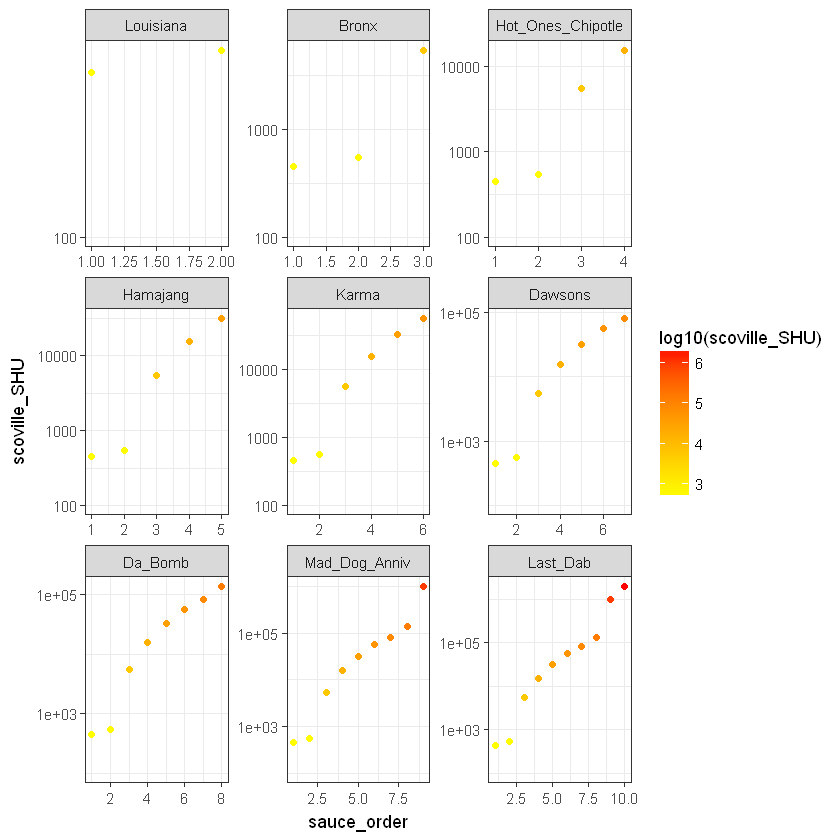

In [6]:
# # Linear
# sauces_df %>%
#   ggplot(aes(x = sauce_order, y = scoville_SHU, 
#              color = log10(scoville_SHU))) +
#   geom_point() +
#   scale_color_gradient(low = "yellow", high = "red") +
#   facet_wrap(~facet_label, nrow = 3, ncol = 3, scales = "free") +
#   theme_bw()

# Semilogarithmic
graph = sauces_df %>%
  ggplot(aes(x = sauce_order, y = scoville_SHU, 
             color = log10(scoville_SHU))) +
  geom_point() +
  scale_color_gradient(low = "yellow", high = "red") +
  facet_wrap(~facet_label, nrow = 3, ncol = 3, scales = "free") +
  theme_bw() +
  scale_y_continuous(limits = c(100, NA), trans="log10")
print(graph)

Conclusion: If people taste heat on a log scale (see link), the progression of most of the sauces is actually fairly consistent. Although most contestants have trouble stepping up to "Da Bomb", the level jump really occurs on the following sauce. This suggests that heat isn't the driving issue with "Da Bomb".

"Why humans perceive logarithmically" <br><https://rss.onlinelibrary.wiley.com/doi/pdf/10.1111/j.1740-9713.2013.00636.x>